# Flight Price Prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_excel(r"Data_Train.xlsx")
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df_test = pd.read_excel (r"Test_set.xlsx")
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [4]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df_train.shape

(10683, 11)

In [7]:
df_test.shape

(2671, 10)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [10]:
sum(df_train.duplicated())

220

In [11]:
sum(df_test.duplicated())

26

In [12]:
df2_test = df_test.drop_duplicates()
df2_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [13]:
df2_test.shape

(2645, 10)

In [15]:
df1_train = df_train.drop_duplicates()
df1_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [16]:
df1_train.shape

(10463, 11)

In [17]:
df1_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [18]:
df1_train.dropna(inplace = True)

In [19]:
df1_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

There are no null values

<AxesSubplot:>

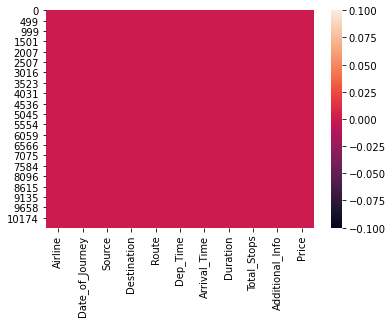

In [20]:
sns.heatmap(df1_train.isnull())

In [21]:
df2_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

<AxesSubplot:>

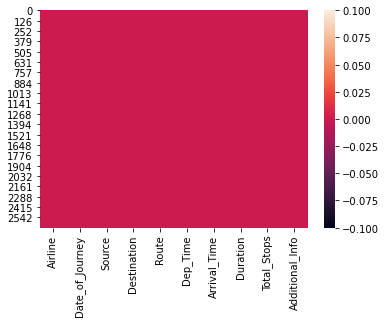

In [22]:
sns.heatmap(df2_test.isnull())

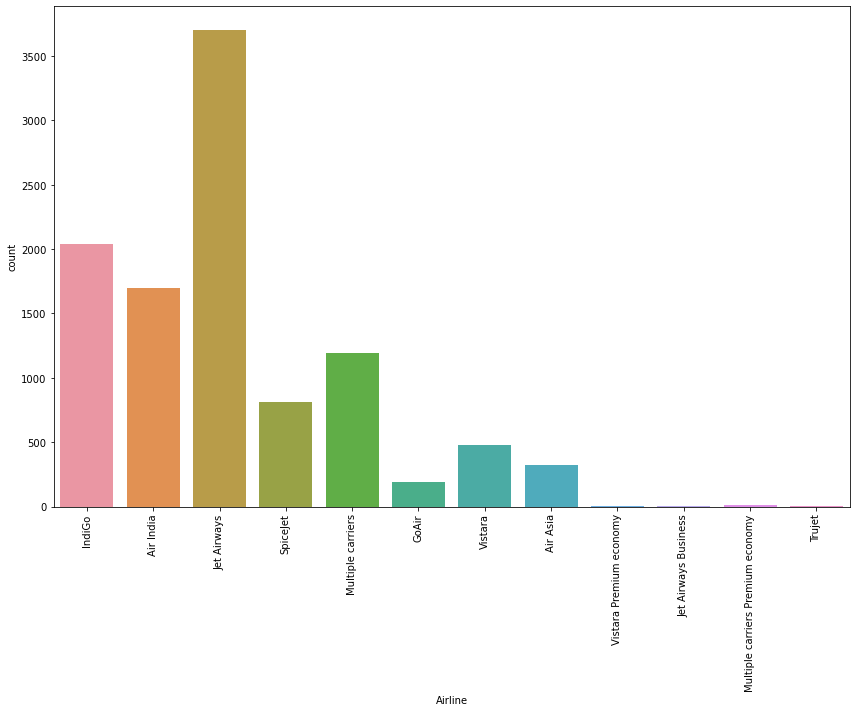

In [23]:
plt.figure(figsize=(12, 10))
sns.countplot(x = df1_train['Airline'])
plt.xticks(rotation = 90)
plt.tight_layout()

we observed in that above count plot jet airways airline is more in flights.

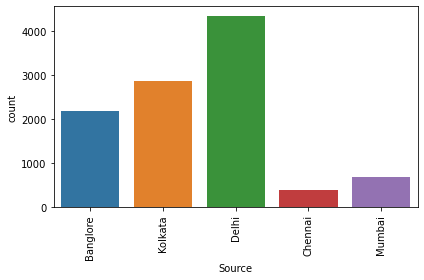

In [24]:
sns.countplot(x = df1_train['Source'])
plt.xticks(rotation = 90)
plt.tight_layout()

more flight start from Delhi and lesser from chennai and mumbai

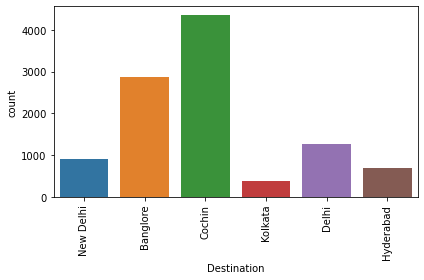

In [25]:
sns.countplot(x = df1_train['Destination'])
plt.xticks(rotation = 90)
plt.tight_layout()

more people fly to cochin

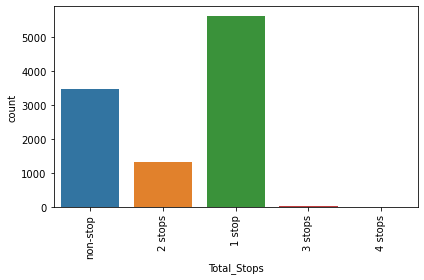

In [26]:
sns.countplot(x = df1_train['Total_Stops'])
plt.xticks(rotation = 90)
plt.tight_layout()

There are more one stop flights

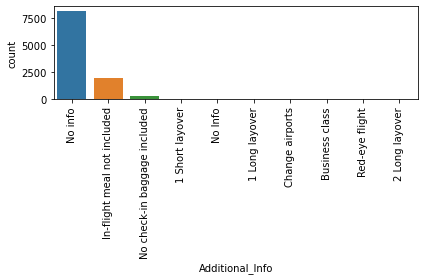

In [27]:
sns.countplot(x = df1_train['Additional_Info'])
plt.xticks(rotation = 90)
plt.tight_layout()

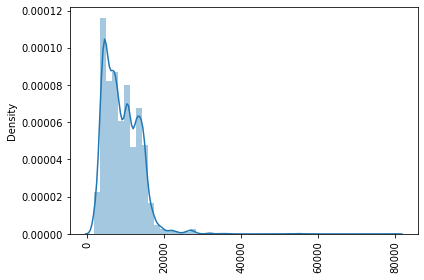

In [28]:
sns.distplot(x = df1_train['Price'])
plt.xticks(rotation = 90)
plt.tight_layout()

In [29]:
df1_train['journey_date'] = pd.to_datetime(df1_train['Date_of_Journey']).dt.day
df1_train['journey_month'] = pd.to_datetime(df1_train['Date_of_Journey']).dt.month
df1_train =df1_train.drop(columns = ['Date_of_Journey'],axis = 1)

In [30]:
df1_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [31]:
df2_test['journey_date'] = pd.to_datetime(df2_test['Date_of_Journey']).dt.day
df2_test['journey_month'] = pd.to_datetime(df2_test['Date_of_Journey']).dt.month
df2_test =df2_test.drop(columns = ['Date_of_Journey'],axis = 1)

In [32]:
df2_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_date,journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [33]:
df1_train['dep_hour'] = pd.to_datetime(df1_train['Dep_Time']).dt.hour
df1_train['dep_min'] = pd.to_datetime(df1_train['Dep_Time']).dt.minute
df1_train =df1_train.drop(columns = ['Dep_Time'],axis = 1)

In [34]:
df1_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [35]:
df2_test['dep_hour'] = pd.to_datetime(df2_test['Dep_Time']).dt.hour
df2_test['dep_min'] = pd.to_datetime(df2_test['Dep_Time']).dt.minute
df2_test =df2_test.drop(columns = ['Dep_Time'],axis = 1)

In [36]:
df2_test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_date,journey_month,dep_hour,dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,5,12,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [37]:
df1_train['Arrival_hour'] = pd.to_datetime(df1_train['Arrival_Time']).dt.hour
df1_train['Arrival_min'] = pd.to_datetime(df1_train['Arrival_Time']).dt.minute
df1_train =df1_train.drop(columns = ['Arrival_Time'],axis = 1)

In [38]:
df1_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [39]:
df2_test['Arrival_hour'] = pd.to_datetime(df2_test['Arrival_Time']).dt.hour
df2_test['Arrival_min'] = pd.to_datetime(df2_test['Arrival_Time']).dt.minute
df2_test =df2_test.drop(columns = ['Arrival_Time'],axis = 1)

In [40]:
df2_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_date,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [41]:
duration = list(df1_train["Duration"])


for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]         

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [42]:
df1_train["Duration_hours"] = duration_hours
df1_train["Duration_mins"] = duration_mins
df1_train.drop(["Duration"], axis = 1, inplace = True)

In [43]:
df1_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_date,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [45]:
duration = list(df2_test["Duration"])


for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [46]:
df2_test["Duration_hours"] = duration_hours
df2_test["Duration_mins"] = duration_mins
df2_test.drop(["Duration"], axis = 1, inplace = True)

In [47]:
df2_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_date,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [48]:
df1_train.drop(columns = ['Route'],axis = 1,inplace = True)
df2_test.drop(columns = ['Route'],axis = 1,inplace = True)

In [49]:
df1_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df2_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [50]:
df1_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_date,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,3,1,16,50,21,35,4,45


Applying label Encoder technique to convert categorical into numerical values

In [51]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cols = ['Airline','Source','Destination','Additional_Info']
for i in cols:
    df1_train[cols]= df1_train[cols].apply(labelencoder.fit_transform)
    df2_test[cols]= df2_test[cols].apply(labelencoder.fit_transform)

In [52]:
df1_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_date,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,0,8,3897,24,3,22,20,1,10,2,50
1,1,3,0,2,8,7662,5,1,5,50,13,15,7,25
2,4,2,1,2,8,13882,6,9,9,25,4,25,19,0
3,3,3,0,1,8,6218,5,12,18,5,23,30,5,25
4,3,0,5,1,8,13302,3,1,16,50,21,35,4,45


In [53]:
df2_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,journey_date,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,4,2,1,1,5,6,6,17,30,4,25,10,55
1,3,3,0,1,5,5,12,6,20,10,20,4,0
2,4,2,1,1,3,21,5,19,15,19,0,23,45
3,6,2,1,1,5,21,5,8,0,21,0,13,0
4,0,0,2,0,5,24,6,23,55,2,45,2,50


In [54]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10462 non-null  int64
 1   Source           10462 non-null  int64
 2   Destination      10462 non-null  int64
 3   Total_Stops      10462 non-null  int64
 4   Additional_Info  10462 non-null  int64
 5   Price            10462 non-null  int64
 6   journey_date     10462 non-null  int64
 7   journey_month    10462 non-null  int64
 8   dep_hour         10462 non-null  int64
 9   dep_min          10462 non-null  int64
 10  Arrival_hour     10462 non-null  int64
 11  Arrival_min      10462 non-null  int64
 12  Duration_hours   10462 non-null  int64
 13  Duration_mins    10462 non-null  int64
dtypes: int64(14)
memory usage: 1.5 MB


In [55]:
df2_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          2645 non-null   int64
 1   Source           2645 non-null   int64
 2   Destination      2645 non-null   int64
 3   Total_Stops      2645 non-null   int64
 4   Additional_Info  2645 non-null   int64
 5   journey_date     2645 non-null   int64
 6   journey_month    2645 non-null   int64
 7   dep_hour         2645 non-null   int64
 8   dep_min          2645 non-null   int64
 9   Arrival_hour     2645 non-null   int64
 10  Arrival_min      2645 non-null   int64
 11  Duration_hours   2645 non-null   int64
 12  Duration_mins    2645 non-null   int64
dtypes: int64(13)
memory usage: 289.3 KB


In [56]:
df1_train.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
journey_date       0
journey_month      0
dep_hour           0
dep_min            0
Arrival_hour       0
Arrival_min        0
Duration_hours     0
Duration_mins      0
dtype: int64

In [57]:
df2_test.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
journey_date       0
journey_month      0
dep_hour           0
dep_min            0
Arrival_hour       0
Arrival_min        0
Duration_hours     0
Duration_mins      0
dtype: int64

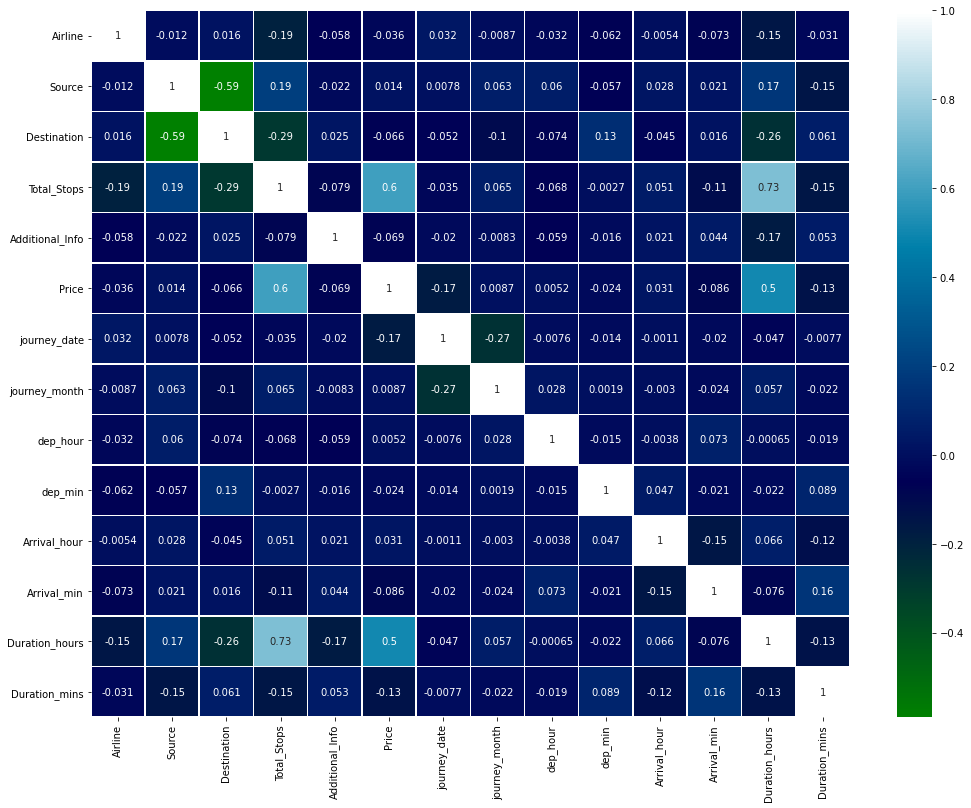

In [58]:
fig, ax = plt.subplots(figsize=(17,13))
sns.heatmap(df1_train.corr(),cmap = 'ocean', annot=True, linewidths=.5, ax=ax)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

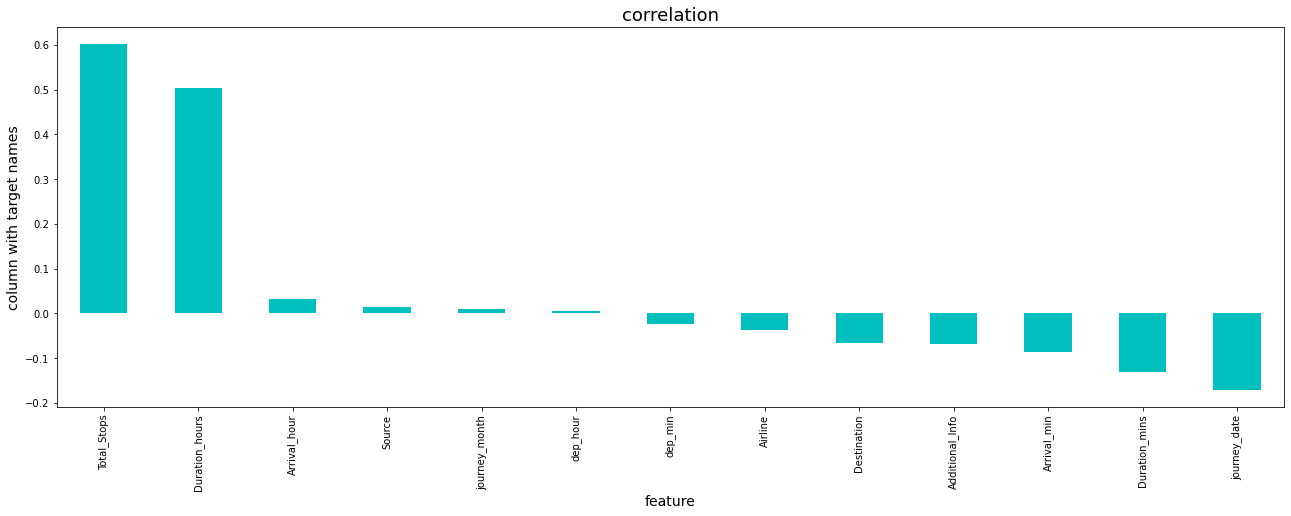

In [59]:
plt.figure(figsize=(22,7))
df1_train.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show


From the above correlation matrix,we can see there is no correlation between features vs features and features vs target.

Splitting feature and weight variables

In [60]:
X = df1_train.drop(columns =['Price'],axis = 1)
y = df1_train['Price']

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [62]:
x.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,journey_date,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,-0.414916,-1.646877,2.404213,-1.214593,0.497963,1.293326,-0.846221,1.662578,-0.234123,-1.807045,-0.888367,-0.958051,1.290990
1,-1.260756,0.882057,-0.972012,1.813062,0.497963,-0.867922,-1.513956,-1.305841,1.360364,-0.056554,-0.586611,-0.361223,-0.190195
2,0.008004,0.039079,-0.296767,1.813062,0.497963,-0.754172,1.156984,-0.607390,0.031625,-1.369422,0.016902,1.071164,-1.671380
3,-0.414916,0.882057,-0.972012,0.299235,0.497963,-0.867922,2.158586,0.964126,-1.031367,1.402189,0.318658,-0.599954,-0.190195
4,-0.414916,-1.646877,2.404213,0.299235,0.497963,-1.095422,-1.513956,0.614900,1.360364,1.110440,0.620415,-0.719320,0.994753


In [63]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

# Model Building

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=50)

In [66]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8369, 13), (2093, 13), (8369,), (2093,))

In [67]:
kn = KNeighborsRegressor()
dc = DecisionTreeRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()

r2_Score 0.892764814310143
CV Score 0.8720560384526366
MSE 2195782.15047436
RMSE 1481.8171784921244
Train Score 0.9776390923189265
Test Score 0.892764814310143


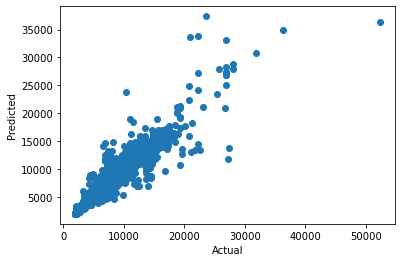

In [68]:
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
scr_rf = cross_val_score(rf,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_rf.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", rf.score(x_train,y_train))
print("Test Score", rf.score(x_test,y_test))


plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

r2_Score 0.8029675036600341
CV Score 0.7836033082730722
MSE 4034500.7633779263
RMSE 2008.6066721431366
Train Score 0.995926355613127
Test Score 0.8029675036600341


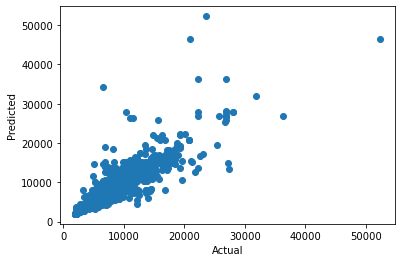

In [69]:
dc.fit(x_train,y_train)
y_pred = dc.predict(x_test)
scr_dc = cross_val_score(dc,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_dc.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", dc.score(x_train,y_train))
print("Test Score", dc.score(x_test,y_test))


plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

r2_Score 0.7474191099426459
CV Score 0.6196034768374088
MSE 5171927.538251313
RMSE 2274.1872258570343
Train Score 0.8251607880139697
Test Score 0.7474191099426459


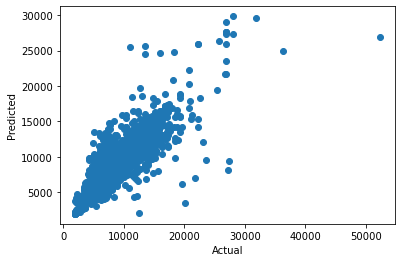

In [70]:
#KNeighborsRegressor
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
scr_kn = cross_val_score(kn,X,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_kn.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", kn.score(x_train,y_train))
print("Test Score", kn.score(x_test,y_test))


plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

r2_Score 0.9108168662081545
CV Score 0.8919184229293291
MSE 1826142.5300261653
RMSE 1351.3484117821597
Train Score 0.9735905485225135
Test Score 0.9108168662081545


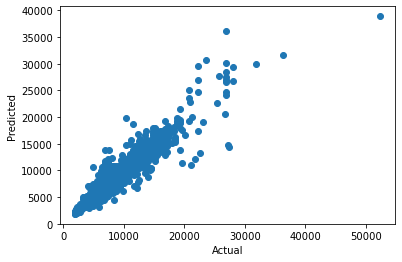

In [71]:
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
scr_xgb = cross_val_score(xgb,X,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_xgb.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", xgb.score(x_train,y_train))
print("Test Score", xgb.score(x_test,y_test))

plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Random Forest is the best model

# Hyper parameter tuning

In [72]:
params = {'n_estimators':[20,70,100],
          'max_depth':[None,5,10],
          'min_samples_split':[2,7],
          'min_samples_leaf':[1,2,4]}

In [73]:
grid_search = GridSearchCV(rf,params,cv=3,verbose = 2,n_jobs = 4)

In [74]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 7],
                         'n_estimators': [20, 70, 100]},
             verbose=2)

In [75]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [76]:
final_model = RandomForestRegressor(criterion = 'mse', max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
final_model.fit(x_train, y_train)
y_predict = final_model.predict(x_test)
print ('r2_Score:',r2_score(y_test,y_predict))
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

r2_Score: 0.8899124409729667
MAE: 713.1056640502354
MSE: 2254188.2642882983
RMSE: 1501.3954390127533


In [77]:
print("r2_Score:", r2_score(y_test,y_predict))
print("Train Score:", final_model.score(x_train,y_train))
print("Test Score:", final_model.score(x_test,y_test))

r2_Score: 0.8899124409729667
Train Score: 0.9783300562291477
Test Score: 0.8899124409729667


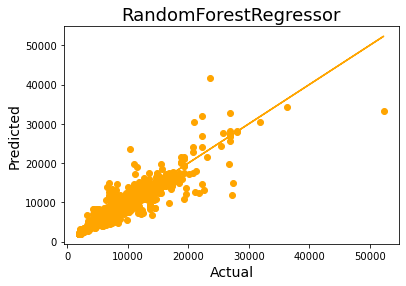

In [78]:
plt.scatter(x = y_test, y = y_predict, color = 'orange')
plt.plot(y_test, y_test, color = 'orange')
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('RandomForestRegressor', fontsize = 18)
plt.show()

We can see that model is linear and distance between residuals and best fit line is less and that proves that model is good,even though we can see some points far from the best fit line but very few.

# Saving the model

In [79]:
import joblib
joblib.dump(final_model,"Flight_price.prediction")

['Flight_price.prediction']